In [0]:
# Let's mount the google drive first to colab

from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Importing the Neccesary libraries
# using tensorflow 2

%tensorflow_version 2.x
import tensorflow as tf
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Flatten, Dense, Dropout, Reshape, MaxPool2D

TensorFlow 2.x selected.


In [0]:
# open the file for reading using h5py

f = h5py.File('/content/drive/My Drive/Colab Notebooks/Project/NN/SVHN_single_grey1.h5','r')

In [4]:
# h5py.File act like a directory in python. So need to check the paths

print("Keys: %s" % f.keys())

a_group_key = list(f.keys())
print(a_group_key)

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
# Extracting the Datasets into memory

x_train = np.array(f['X_train'])
y_train = np.array(f['y_train'])
x_val = np.array(f['X_val'])
y_val = np.array(f['y_val'])
x_test = np.array(f['X_test'])
y_test = np.array(f['y_test'])

In [6]:
# Printing the shape and size of data sets

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)


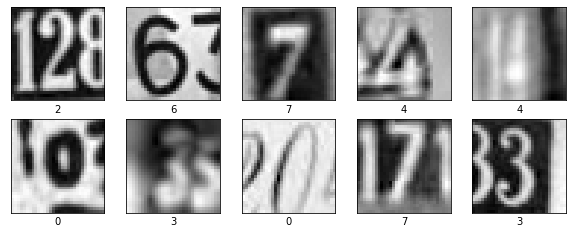

In [7]:
# Checking the sample images 

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [8]:
y_unique, y_unique_count = np.unique(y_train, return_counts=True)

for index in range(len(y_unique)):
    print("count for %2d is %2d" %(y_unique[index], y_unique_count[index]))

count for  0 is 4186
count for  1 is 4172
count for  2 is 4197
count for  3 is 4281
count for  4 is 4188
count for  5 is 4232
count for  6 is 4168
count for  7 is 4192
count for  8 is 4188
count for  9 is 4196


In [9]:
# From above we can say that data is well distributed data.
# Now checking the data types
print(x_test.dtype)
print(x_train.dtype)
print(x_val.dtype)
print(y_test.dtype)
print(y_train.dtype)
print(y_val.dtype)

float32
float32
float32
uint8
uint8
uint8


In [0]:
# Converting the target variable to binary format
# number of classes = 10 = num_classes
y_train_tf = to_categorical(y_train, num_classes=10)
y_test_tf = to_categorical(y_test, num_classes=10)
y_val_tf = to_categorical(y_val, num_classes=10)

In [11]:
# Checking the target column properly converted or not

print("Original value for the first element is: %2d" %(y_train[0]))
print("After transformation value for the first element: ")
print(y_train_tf[0])

Original value for the first element is:  2
After transformation value for the first element: 
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#  We can reshape using expand dims
x_train_with_dims = tf.keras.backend.expand_dims(x_train,axis=-1)
x_test_with_dims = tf.keras.backend.expand_dims(x_test,axis=-1)
x_val_with_dims = tf.keras.backend.expand_dims(x_val,axis=-1)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

**Generating first Deep neural Model**

Model consist of following:

- Reshape layer to reshape the input data(32 * 32) to (1024 * 1)
- Using the Batch Normalization for normalizing the data
- 4 hidden layers followed by batch normalization layers and dropout layer

In [0]:
def create_DNN_model():
    model_DNN = Sequential()

    model_DNN.add(Reshape((1024,),input_shape=(32,32,)))
    model_DNN.add(BatchNormalization())

    # Hidden layer
    model_DNN.add(Dense(200, activation='relu', name='Layer_1'))
    model_DNN.add(BatchNormalization())

    # Hidden layer
    model_DNN.add(Dense(100, activation='relu', name='Layer_2'))
    model_DNN.add(BatchNormalization())
    # Dropout layer
    model_DNN.add(Dropout(0.5))

    # Hidden layer
    model_DNN.add(Dense(60, activation='relu', name='Layer_3'))
    model_DNN.add(BatchNormalization())

    # Hidden layer
    model_DNN.add(Dense(30, activation='relu', name='Layer_4'))
    model_DNN.add(BatchNormalization())
    # Dropout layer
    model_DNN.add(Dropout(0.3))

    # Output layer
    model_DNN.add(Dense(10, activation='softmax', name='Output'))

    return model_DNN

In [0]:
def create_CNN_model():
    #Initialize Sequential model
    model = Sequential()

    #normalize data
    model.add(BatchNormalization())

    #Add first convolutional layer
    model.add(Conv2D(32, #Number of filters 
                                    kernel_size=(3,3), #Size of the filter
                                    activation='relu'))

    #Add second convolutional layer
    model.add(Conv2D(32, #Number of filters 
                                    kernel_size=(3,3), #Size of the filter
                                    activation='relu'))

    #Add MaxPooling layer
    model.add(MaxPool2D(pool_size=(2,2)))

    #Flatten the output
    model.add(Flatten())

    #Dense layer
    model.add(Dense(200, activation='relu'))

    #Add another dropout layer
    model.add(Dropout(0.25))

    #Dense layer
    model.add(Dense(100, activation='relu'))

    #Add another dropout layer
    model.add(Dropout(0.25))

    #Output layer
    model.add(Dense(10, activation='softmax'))

    return model

# model.compile(optimizer='adam', 
#               loss='categorical_crossentropy', metrics=['accuracy'])

**Now Let's use these function to create model with different optimizers to get check which optimizer suits better**

In [16]:
# let's start with default sgd on DNN
dnn_model_sgd = create_DNN_model()
dnn_model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model_sgd_output = dnn_model_sgd.fit(x_train,y_train_tf,          
            validation_data=(x_val,y_val_tf),
            epochs=30,
            batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 13s 316us/sample - loss: 2.3403 - accuracy: 0.1726 - val_loss: 1.7947 - val_accuracy: 0.4211
Epoch 2/30
42000/42000 [==============================] - 12s 281us/sample - loss: 1.8639 - accuracy: 0.3376 - val_loss: 1.4381 - val_accuracy: 0.5517
Epoch 3/30
42000/42000 [==============================] - 12s 284us/sample - loss: 1.6749 - accuracy: 0.4163 - val_loss: 1.2971 - val_accuracy: 0.5898
Epoch 4/30
42000/42000 [==============================] - 12s 288us/sample - loss: 1.5752 - accuracy: 0.4618 - val_loss: 1.1683 - val_accuracy: 0.6395
Epoch 5/30
42000/42000 [==============================] - 12s 283us/sample - loss: 1.4824 - accuracy: 0.5035 - val_loss: 1.0952 - val_accuracy: 0.6603
Epoch 6/30
42000/42000 [==============================] - 12s 286us/sample - loss: 1.4126 - accuracy: 0.5340 - val_loss: 0.9964 - val_accuracy: 0.7008
Epoch 7/30
42000/42000 [====================

In [17]:
# using default adam on DNN

dnn_model_adam = create_DNN_model()
dnn_model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_model_adam_output = dnn_model_adam.fit(x_train,y_train_tf,          
            validation_data=(x_val,y_val_tf),
            epochs=30,
            batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 14s 322us/sample - loss: 2.1110 - accuracy: 0.2533 - val_loss: 1.5097 - val_accuracy: 0.4993
Epoch 2/30
42000/42000 [==============================] - 12s 290us/sample - loss: 1.6247 - accuracy: 0.4425 - val_loss: 1.1671 - val_accuracy: 0.6265
Epoch 3/30
42000/42000 [==============================] - 12s 294us/sample - loss: 1.4331 - accuracy: 0.5317 - val_loss: 1.0237 - val_accuracy: 0.6776
Epoch 4/30
42000/42000 [==============================] - 12s 294us/sample - loss: 1.2893 - accuracy: 0.5884 - val_loss: 0.8564 - val_accuracy: 0.7416
Epoch 5/30
42000/42000 [==============================] - 12s 295us/sample - loss: 1.1909 - accuracy: 0.6267 - val_loss: 0.8138 - val_accuracy: 0.7535
Epoch 6/30
42000/42000 [==============================] - 12s 296us/sample - loss: 1.1178 - accuracy: 0.6538 - val_loss: 0.7323 - val_accuracy: 0.7801
Epoch 7/30
42000/42000 [====================

In [20]:
# using default sgd on CNN

cnn_model_sgd = create_CNN_model()
cnn_model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_sgd_output = cnn_model_sgd.fit(x_train_with_dims ,tf.convert_to_tensor(y_train_tf),          
            validation_data=(x_val_with_dims,tf.convert_to_tensor(y_val_tf)),
            epochs=30,
            batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 13s 304us/sample - loss: 2.1324 - accuracy: 0.2263 - val_loss: 1.4768 - val_accuracy: 0.5258
Epoch 2/30
42000/42000 [==============================] - 10s 245us/sample - loss: 1.1009 - accuracy: 0.6451 - val_loss: 0.6332 - val_accuracy: 0.8175
Epoch 3/30
42000/42000 [==============================] - 10s 245us/sample - loss: 0.6874 - accuracy: 0.7925 - val_loss: 0.4680 - val_accuracy: 0.8679
Epoch 4/30
42000/42000 [==============================] - 10s 248us/sample - loss: 0.5572 - accuracy: 0.8338 - val_loss: 0.4103 - val_accuracy: 0.8835
Epoch 5/30
42000/42000 [==============================] - 10s 242us/sample - loss: 0.4858 - accuracy: 0.8541 - val_loss: 0.3711 - val_accuracy: 0.8937
Epoch 6/30
42000/42000 [==============================] - 10s 243us/sample - loss: 0.4315 - accuracy: 0.8720 - val_loss: 0.3203 - val_accuracy: 0.9099
Epoch 7/30
42000/42000 [====================

In [22]:
# using default adam on CNN

cnn_model_adam = create_CNN_model()
cnn_model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_adam_output = cnn_model_adam.fit(x_train_with_dims ,tf.convert_to_tensor(y_train_tf),          
            validation_data=(x_val_with_dims,tf.convert_to_tensor(y_val_tf)),
            epochs=30,
            batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 11s 261us/sample - loss: 0.8497 - accuracy: 0.7250 - val_loss: 0.4086 - val_accuracy: 0.8764
Epoch 2/30
42000/42000 [==============================] - 10s 248us/sample - loss: 0.4545 - accuracy: 0.8606 - val_loss: 0.3187 - val_accuracy: 0.9063
Epoch 3/30
42000/42000 [==============================] - 10s 245us/sample - loss: 0.3647 - accuracy: 0.8895 - val_loss: 0.2529 - val_accuracy: 0.9269
Epoch 4/30
42000/42000 [==============================] - 10s 246us/sample - loss: 0.3097 - accuracy: 0.9053 - val_loss: 0.2141 - val_accuracy: 0.9384
Epoch 5/30
42000/42000 [==============================] - 10s 245us/sample - loss: 0.2648 - accuracy: 0.9183 - val_loss: 0.2019 - val_accuracy: 0.9433
Epoch 6/30
42000/42000 [==============================] - 10s 249us/sample - loss: 0.2322 - accuracy: 0.9277 - val_loss: 0.1810 - val_accuracy: 0.9497
Epoch 7/30
42000/42000 [====================

**Checking all the model performance on the test set**

In [0]:
# Checking all the model performance on the test set

dnn_model_sgd_test_result = dnn_model_sgd.evaluate(x_test, y_test_tf, batch_size=32)
dnn_model_adam_test_result = dnn_model_adam.evaluate(x_test, y_test_tf, batch_size=32)
cnn_model_sgd_test_result = cnn_model_sgd.evaluate(x_test_with_dims, tf.convert_to_tensor(y_test_tf), batch_size=32)
cnn_model_adam_test_result = cnn_model_adam.evaluate(x_test_with_dims, tf.convert_to_tensor(y_test_tf), batch_size=32)

In [32]:
# Checking all the model performance on the test set
print("For model - dnn_model_sgd --> loss = %2f and accuracy = %2f" %(dnn_model_sgd_test_result[0], dnn_model_sgd_test_result[1] * 100))
print("For model - dnn_model_adam --> loss = %2f and accuracy = %2f" %(dnn_model_adam_test_result[0], dnn_model_adam_test_result[1] * 100))
print("For model - cnn_model_sgd --> loss = %2f and accuracy = %2f" %(cnn_model_sgd_test_result[0], cnn_model_sgd_test_result[1] * 100))
print("For model - cnn_model_adam --> loss = %2f and accuracy = %2f" %(cnn_model_adam_test_result[0], cnn_model_adam_test_result[1] * 100))

For model - dnn_model_sgd --> loss = 0.595467 and accuracy = 81.999999
For model - dnn_model_adam --> loss = 0.476366 and accuracy = 85.733336
For model - cnn_model_sgd --> loss = 0.466093 and accuracy = 91.072220
For model - cnn_model_adam --> loss = 0.593597 and accuracy = 90.488887


**Classification reports and confusion_matrix**

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
# For dnn_model_sgd
print("Please find the classification report for dnn_model_sgd as following: \n")
print(classification_report(dnn_model_sgd.predict_classes(x_test), y_test))
print("\n confusion matrix ")
print(confusion_matrix(dnn_model_sgd .predict_classes(x_test), y_test)) 

Please find the classification report for dnn_model_sgd as following: 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1940
           1       0.86      0.80      0.83      1972
           2       0.83      0.88      0.85      1690
           3       0.75      0.77      0.76      1675
           4       0.86      0.85      0.86      1851
           5       0.81      0.76      0.79      1876
           6       0.79      0.84      0.81      1724
           7       0.87      0.85      0.86      1841
           8       0.77      0.81      0.79      1722
           9       0.78      0.82      0.80      1709

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000


 confusion matrix 
[[1583   50   20   27   25   16   53   25   45   96]
 [  37 1572   44   43   73   21   26   85   37   34]
 [   9   15 1490   39   26   15   10   37  

In [43]:
# For dnn_model_adam 
print("Please find the classification report for dnn_model_adam as following: \n")
print(classification_report(dnn_model_adam.predict_classes(x_test), y_test))
print("\n confusion matrix ")
print(confusion_matrix(dnn_model_adam.predict_classes(x_test), y_test)) 

Please find the classification report for dnn_model_adam as following: 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1813
           1       0.89      0.81      0.85      2001
           2       0.85      0.91      0.88      1686
           3       0.81      0.82      0.81      1698
           4       0.89      0.89      0.89      1810
           5       0.88      0.79      0.83      1957
           6       0.84      0.87      0.86      1760
           7       0.88      0.89      0.88      1784
           8       0.82      0.84      0.83      1760
           9       0.83      0.86      0.85      1731

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000


 confusion matrix 
[[1615   22   18   11   12    6   33   12   28   56]
 [  32 1626   37   32   57   10   27   94   40   46]
 [   7   18 1540   19   23   12    9   22 

In [45]:
# For cnn_model_sgd
print("Please find the classification report for cnn_model_sgd as following: \n")
print(classification_report(cnn_model_sgd.predict_classes(x_test_with_dims), y_test))
print("\n confusion matrix ")
print(confusion_matrix(cnn_model_sgd.predict_classes(x_test_with_dims), y_test)) 

Please find the classification report for cnn_model_sgd as following: 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1805
           1       0.92      0.88      0.90      1902
           2       0.91      0.94      0.92      1750
           3       0.89      0.88      0.88      1729
           4       0.93      0.93      0.93      1825
           5       0.91      0.90      0.90      1802
           6       0.89      0.92      0.91      1772
           7       0.94      0.91      0.92      1857
           8       0.89      0.91      0.90      1778
           9       0.90      0.91      0.91      1780

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000


 confusion matrix 
[[1688   14    8    2    7    3   20   10   15   38]
 [  24 1681   24   24   40    9   13   45   20   22]
 [   4    7 1637   23    8    8   11   19  

In [40]:
# For cnn_model_adam
print("Please find the classification report for cnn_model_adam as following: \n")
print(classification_report(cnn_model_adam.predict_classes(x_test_with_dims), y_test))
print("\n confusion matrix ")
print(confusion_matrix(cnn_model_adam.predict_classes(x_test_with_dims), y_test)) 

Please find the classification report for cnn_model_adam as following: 

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1789
           1       0.92      0.87      0.90      1937
           2       0.90      0.96      0.92      1692
           3       0.85      0.91      0.88      1615
           4       0.94      0.90      0.92      1874
           5       0.92      0.87      0.89      1871
           6       0.88      0.91      0.90      1774
           7       0.93      0.92      0.93      1811
           8       0.88      0.92      0.90      1745
           9       0.91      0.87      0.89      1892

    accuracy                           0.90     18000
   macro avg       0.90      0.91      0.90     18000
weighted avg       0.91      0.90      0.90     18000


 confusion matrix 
[[1663   19   13    7    6    2   21    7   18   33]
 [  37 1689   31   27   32   13   16   60   20   12]
 [   5    6 1616   14    4    6    7   15 

**accuracy vs epoch graph for training and validation set**

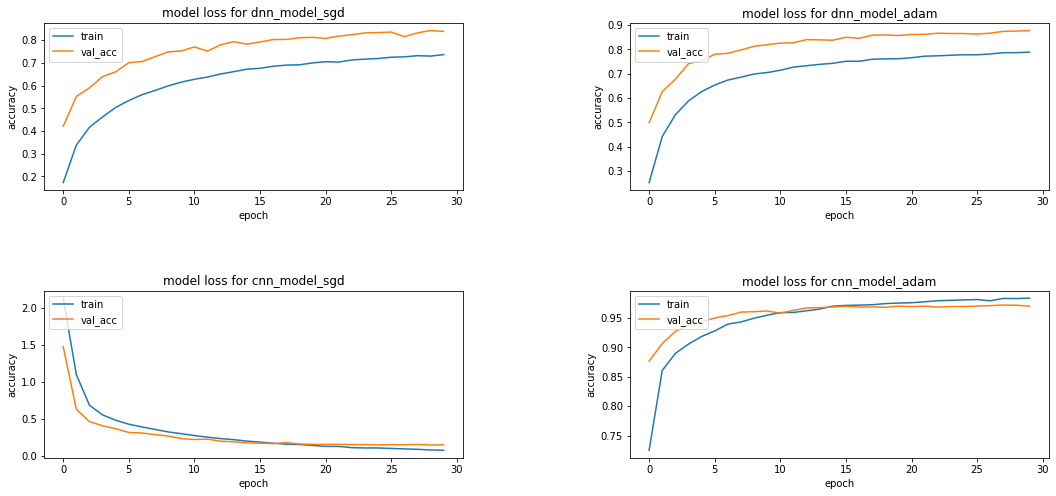

In [71]:
# accuracy vs epoch graph for training and validation set

fig, axs = plt.subplots(2,2, figsize=(18,8))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
axs[0,0].plot(dnn_model_sgd_output.history['accuracy'])
axs[0,0].plot(dnn_model_sgd_output.history['val_accuracy'])
axs[0,0].set_title('model loss for dnn_model_sgd')
axs[0,0].set_ylabel('accuracy')
axs[0,0].set_xlabel('epoch')
axs[0,0].legend(['train', 'val_acc'], loc='upper left')

axs[0,1].plot(dnn_model_adam_output.history['accuracy'])
axs[0,1].plot(dnn_model_adam_output.history['val_accuracy'])
axs[0,1].set_title('model loss for dnn_model_adam')
axs[0,1].set_ylabel('accuracy')
axs[0,1].set_xlabel('epoch')
axs[0,1].legend(['train', 'val_acc'], loc='upper left')

axs[1,0].plot(cnn_model_sgd_output.history['loss'])
axs[1,0].plot(cnn_model_sgd_output.history['val_loss'])
axs[1,0].set_title('model loss for cnn_model_sgd')
axs[1,0].set_ylabel('accuracy')
axs[1,0].set_xlabel('epoch')
axs[1,0].legend(['train', 'val_acc'], loc='upper left')

axs[1,1].plot(cnn_model_adam_output.history['accuracy'])
axs[1,1].plot(cnn_model_adam_output.history['val_accuracy'])
axs[1,1].set_title('model loss for cnn_model_adam')
axs[1,1].set_ylabel('accuracy')
axs[1,1].set_xlabel('epoch')
axs[1,1].legend(['train', 'val_acc'], loc='upper left')


plt.show()

In [72]:
# Lets see he summary of the models

dnn_model_sgd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [73]:
# Lets see he summary of the models
cnn_model_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc multiple                  4         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  320       
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  1254600   
_________________________________________________________________
dropout_6 (Dropout)          multiple                 

Following observation can be said from the above excercise:

- From the classification report we can say cnn model with sgd optimizer did the best in terms of accuracy and f1 score.
- From the model summary we can see that clearly the Model Without the Convolution have less number of traininng parameters.
- Inspite of having less number of trainable parameters in the model(DNN model) took more time than CNN models to train (All the models were trained on Google colab GPU on).
- There can be still better model than these 4. (if we change the number of layer, neuron, epoch, batch size, optimizer configurations).
- Almost all the model were struggling to classify the classes 3 and 9.